## <center> LGMVIP_DS_ September_23_Task_Number_3-3 <center>
## <center> Hand Written Equation Solver Using CNN <center>
## <center> By K. Pavan Kumar <center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import glob
import re
import PIL
from PIL import Image
import collections
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.applications import InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
source='/kaggle/input/handwritten-math-symbols'
path='/kaggle/input/handwritten-math-symbols/dataset'
destination='/kaggle/working/math-symbols'

In [4]:
import shutil
shutil.copytree(source,destination)

'/kaggle/working/math-symbols'

In [5]:
jpg_files=glob.glob(os.path.join(destination+'/dataset/*/*.jpg'))
png_files=glob.glob(os.path.join(destination+'/dataset/*/*.png'))

In [6]:
image_files_path=jpg_files+png_files

In [7]:
image_files=pd.DataFrame(image_files_path)

In [8]:
image_files.columns=['path']

In [9]:
image_files['label']=image_files['path'].apply(lambda x:"".join(re.findall(r'dataset/(\w+)/',x)))

Text(0.5, 1.0, 'Number of Images in Each Category')

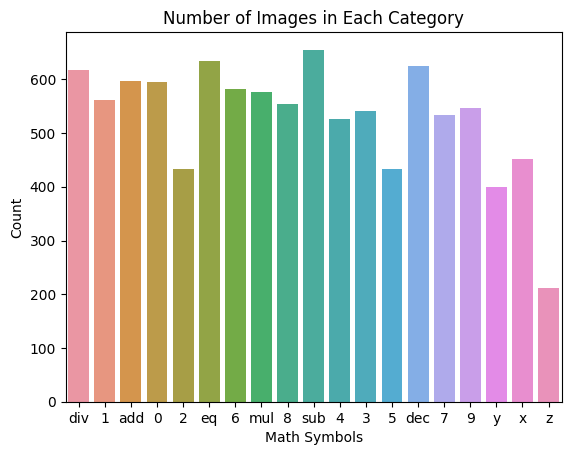

In [10]:
sns.countplot(data=image_files,x='label')
plt.xlabel('Math Symbols')
plt.ylabel('Count')
plt.title('Number of Images in Each Category')

In [11]:
image_files['size']=image_files['path'].apply(lambda x:Image.open(x).size)

In [12]:
Counter(image_files['size'])

Counter({(155, 135): 5310,
         (400, 400): 2367,
         (150, 135): 1103,
         (155, 140): 682,
         (155, 137): 391,
         (150, 140): 139,
         (150, 137): 78,
         (100, 100): 1})

In [13]:
image_height=150
image_width=150
batch_size=32

In [14]:
!pip install augmentor

In [15]:
import Augmentor

In [16]:
class_names=list(set(image_files.label))

In [17]:
for i in class_names:
    p=Augmentor.Pipeline(destination+'/dataset/'+i)
    p.zoom_random(probability=0.5,percentage_area=0.9)
    if len(image_files[image_files.label==i])<250:
        p.sample(300)
    elif len(image_files[image_files.label==i])<450:
        p.sample(100)

Initialised with 433 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/2/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7857A91D3B80>: 100%|██████████| 100/100 [00:00<00:00, 226.08 Samples/s]                


Initialised with 618 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/div/output.Initialised with 526 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/4/output.Initialised with 655 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/sub/output.Initialised with 433 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/5/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7857A921A7A0>: 100%|██████████| 100/100 [00:00<00:00, 121.20 Samples/s]                


Initialised with 399 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/y/output.

Processing <PIL.Image.Image image mode=RGBA size=400x400 at 0x7857A921BFA0>: 100%|██████████| 100/100 [00:01<00:00, 61.22 Samples/s]               


Initialised with 624 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/dec/output.Initialised with 541 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/3/output.Initialised with 562 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/1/output.Initialised with 554 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/8/output.Initialised with 577 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/mul/output.Initialised with 533 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/7/output.Initialised with 596 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/add/output.Initialised with 452 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/x/output.Initialised with 212 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/z/output.

Processing <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=400x400 at 0x7857A91ABC70>: 100%|██████████| 300/300 [00:04<00:00, 61.63 Samples/s]


Initialised with 634 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/eq/output.Initialised with 546 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/9/output.Initialised with 595 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/0/output.Initialised with 581 image(s) found.
Output directory set to /kaggle/working/math-symbols/dataset/6/output.

In [18]:
image_files1=[]
for i in class_names:
    jpg_files1=glob.glob(destination+'/dataset/'+i+'/output/*.jpg')
    png_files1=glob.glob(destination+'/dataset/'+i+'/output/*.png')
    files1=jpg_files1+png_files1
    image_files1.extend(files1)

In [19]:
image_files1=pd.DataFrame(image_files1)
image_files1.columns=['path']
image_files1['label']=image_files1['path'].apply(lambda x:"".join(re.findall(r'dataset/(\w+)/',x)))
image_files1['size']=image_files1['path'].apply(lambda x:Image.open(x).size)

In [20]:
image_files_new=pd.concat([image_files,image_files1],axis=0)
image_files_new.reset_index(inplace=True)

Text(0.5, 1.0, 'Countplot After Augmentation')

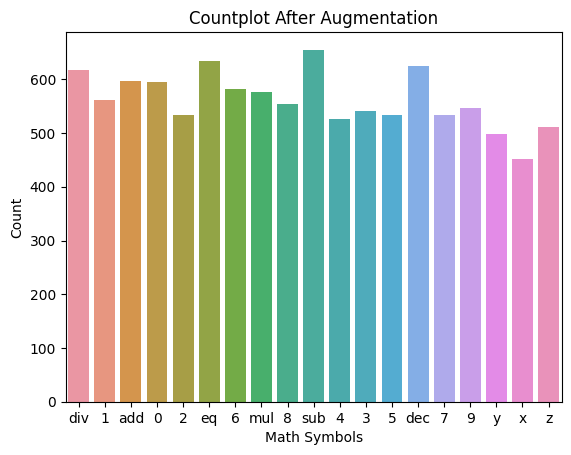

In [21]:
sns.countplot(data=image_files_new,x='label')
plt.xlabel('Math Symbols')
plt.ylabel('Count')
plt.title('Countplot After Augmentation')

In [22]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(destination+'/dataset',seed=123,
                                                   validation_split=0.2,
                                                   subset='training',
                                                   image_size=(image_width,image_height),
                                                   batch_size=batch_size,
                                                   color_mode='rgb')

Found 10671 files belonging to 19 classes.
Using 8537 files for training.


In [23]:
val_dataset=tf.keras.preprocessing.image_dataset_from_directory(destination+'/dataset',seed=123,
                                                               validation_split=0.2,
                                                               subset='validation',
                                                               image_size=(image_width,image_height),
                                                               batch_size=batch_size,
                                                               color_mode='rgb')

Found 10671 files belonging to 19 classes.
Using 2134 files for validation.


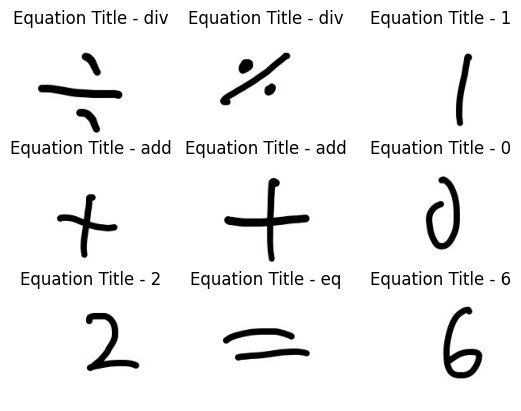

In [24]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Image.open(image_files_new.path[i*400]))
    plt.title('Equation Title - '+image_files_new['label'][i*400])
    plt.axis('off')

In [25]:
aug=keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.05,fill_mode='nearest'),
                     layers.experimental.preprocessing.RandomZoom(height_factor=(0.05,0.05),width_factor=(0.05,0.05),fill_mode='nearest')])

In [26]:
model_name='Math_Symbols_InceptionV3'
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath='/kaggle/working/'+model_name+'{epoch:.02f}.h5'
checkpoint=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,
                          save_weights_only=False,mode='auto',period=1)

In [27]:
model=Sequential(aug)

In [28]:
inceptionv3=InceptionV3(include_top=False,weights='imagenet',input_shape=(image_width,image_height,3))

87910968/87910968 [==============================] - 1s 0us/step


In [29]:
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255,
                                                               input_shape=(image_width,image_height,3)))
model.add(inceptionv3)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(19,activation='softmax'))
model.build(input_shape=(None,image_width,image_height,3))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                      

In [31]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
history=model.fit(train_dataset,validation_data=val_dataset,epochs=20,callbacks=[checkpoint])

Epoch 1/20
267/267 [==============================] - ETA: 0s - loss: 0.5387 - accuracy: 0.8533
Epoch 1: val_loss improved from inf to 1.15950, saving model to /kaggle/working/Math_Symbols_InceptionV31.00.h5
267/267 [==============================] - 92s 144ms/step - loss: 0.5387 - accuracy: 0.8533 - val_loss: 1.1595 - val_accuracy: 0.7704
Epoch 2/20
267/267 [==============================] - ETA: 0s - loss: 0.2007 - accuracy: 0.9439
Epoch 2: val_loss improved from 1.15950 to 1.11689, saving model to /kaggle/working/Math_Symbols_InceptionV32.00.h5
267/267 [==============================] - 34s 125ms/step - loss: 0.2007 - accuracy: 0.9439 - val_loss: 1.1169 - val_accuracy: 0.7788
Epoch 3/20
267/267 [==============================] - ETA: 0s - loss: 0.1408 - accuracy: 0.9626
Epoch 3: val_loss did not improve from 1.11689
267/267 [==============================] - 33s 122ms/step - loss: 0.1408 - accuracy: 0.9626 - val_loss: 2.0295 - val_accuracy: 0.6036
Epoch 4/20
267/267 [===============

Text(0.5, 1.0, 'Inception V3 Loss Value During Training')

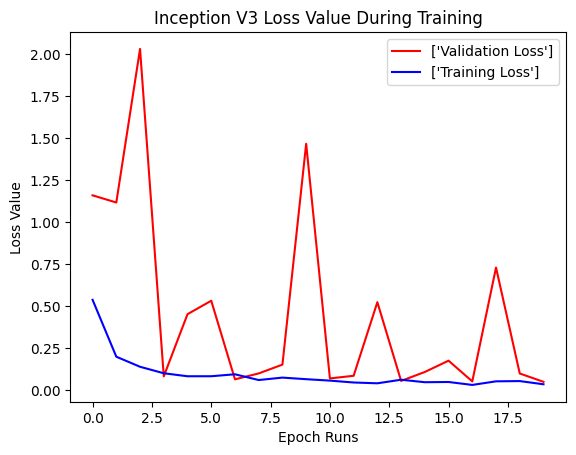

In [33]:
plt.plot(history.history['val_loss'],'r',label=['Validation Loss'])
plt.plot(history.history['loss'],'b',label=['Training Loss'])
plt.legend()
plt.xlabel('Epoch Runs')
plt.ylabel('Loss Value')
plt.title('Inception V3 Loss Value During Training')

Text(0.5, 1.0, 'Inception V3 Accuracy During Training')

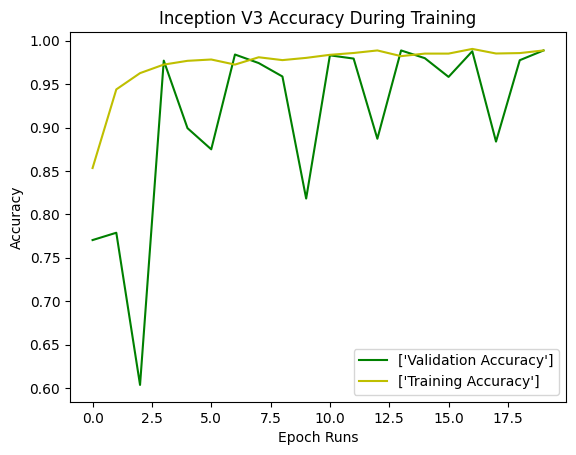

In [34]:
plt.plot(history.history['val_accuracy'],'g',label=['Validation Accuracy'])
plt.plot(history.history['accuracy'],'y',label=['Training Accuracy'])
plt.legend()
plt.xlabel('Epoch Runs')
plt.ylabel('Accuracy')
plt.title('Inception V3 Accuracy During Training')

In [35]:
from tensorflow.keras.models import load_model

In [36]:
my_model=load_model('/kaggle/working/Math_Symbols_InceptionV320.00.h5')

In [64]:
true=[]
for images, labels in val_dataset:
    true.extend(labels.numpy())

In [65]:
true_labels=[val_dataset.class_names[i] for i in true]

In [66]:
predicted=np.argmax(my_model.predict(val_dataset),axis=1)

67/67 [==============================] - 4s 35ms/step


In [67]:
predicted_labels=[val_dataset.class_names[i] for i in predicted]

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [76]:
accuracy_score(true_labels,predicted_labels)

0.05998125585754452

Text(50.722222222222214, 0.5, 'True')

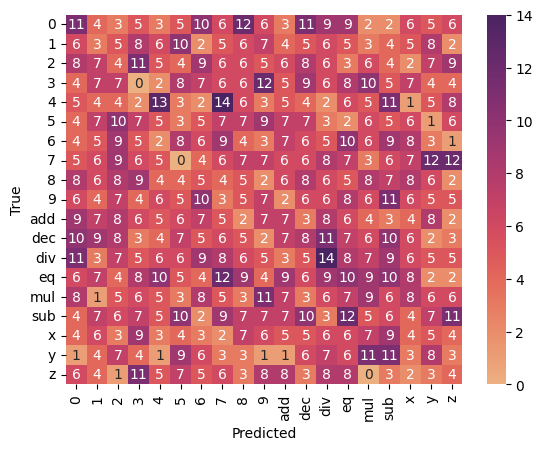

In [74]:
sns.heatmap(confusion_matrix(true_labels,predicted_labels),annot=True,cmap='flare',
           fmt='d',xticklabels=val_dataset.class_names,yticklabels=val_dataset.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')

In [59]:
def identify_number(image):
    sample_image=Image.open(image)
    sample_image_resize=sample_image.resize((150,150))
    sample_image_array=np.array(sample_image_resize)
    sample_image_array_dim=np.expand_dims(sample_image_array,axis=0)
    sample_image_norm=sample_image_array_dim/255.0
    category=model.predict(sample_image_norm)
    return category

In [62]:
identify_number(image_files.path[1000])

1/1 [==============================] - 0s 30ms/step


array([[6.5913959e-04, 2.8751590e-04, 1.8985773e-04, 3.1629192e-05,
        6.7835476e-06, 8.3505572e-04, 8.0135156e-05, 5.0128909e-04,
        6.2330684e-05, 2.9204375e-06, 5.2075462e-05, 8.2000680e-02,
        6.2681019e-04, 1.4959940e-01, 6.0269032e-03, 7.5416476e-01,
        1.5441729e-03, 3.1627130e-03, 1.6577919e-04]], dtype=float32)

In [63]:
np.argmax(identify_number(image_files.path[1000]))

1/1 [==============================] - 0s 31ms/step


15

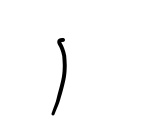

In [48]:
Image.open(image_files.path[600])

In [44]:
train_dataframe=pd.concat([pd.Series(true),pd.Series(true_labels)],axis=1)

In [45]:
train_dataframe.columns=['true','true_label']

In [50]:
train_dataframe[train_dataframe.true==1]

,true,true_label
6,1,1
68,1,1
71,1,1
90,1,1
96,1,1
...,...,...
8476,1,1
8481,1,1
8482,1,1
8509,1,1
